In [1]:
'''from google_images_download import google_images_download   #importing the library
response = google_images_download.googleimagesdownload()   #class instantiation
arguments = {"keywords":"증명사진","limit":150,"print_urls":True}   #creating list of arguments
paths = response.download(arguments)   #passing the arguments to the function
print(paths)'''

'from google_images_download import google_images_download   #importing the library\nresponse = google_images_download.googleimagesdownload()   #class instantiation\narguments = {"keywords":"증명사진","limit":150,"print_urls":True}   #creating list of arguments\npaths = response.download(arguments)   #passing the arguments to the function\nprint(paths)'

In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import pandas as pd
import numpy as np
from keras.utils import to_categorical
import pickle
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import glob


Using TensorFlow backend.


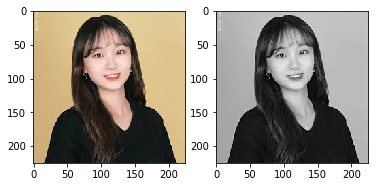

In [3]:
# input image dimensions
img_rows, img_cols = 128, 128

im = cv2.imread("../input/korean/women/3.jpg")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.subplot(1,2,1)
plt.imshow(im)
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
plt.subplot(1,2,2)
plt.imshow(im, cmap="gray")


In [4]:
im.shape

(225, 225)

In [2]:
def loadImageAsGray(imagePath):
    im = cv2.imread(imagePath)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    return im


In [3]:
import glob


def getDataset(path):
    fotos = {}

    for fname in glob.glob(path):
        persona = fname.split('/')[-2]
        print(f"Loading file {fname}")
        if persona in fotos:
            fotos[persona].append(loadImageAsGray(fname))
        else:
            fotos[persona] = [loadImageAsGray(fname)]
    return fotos

fotos = getDataset('../input/other/8clases/*/*.jpg')

Loading file ../input/other/8clases/women/ww140.jpg
Loading file ../input/other/8clases/women/ww83.jpg
Loading file ../input/other/8clases/women/iw381.jpg
Loading file ../input/other/8clases/women/lw66.jpg
Loading file ../input/other/8clases/women/abw17.jpg
Loading file ../input/other/8clases/women/iw270.jpg
Loading file ../input/other/8clases/women/iw391.jpg
Loading file ../input/other/8clases/women/iw160.jpg
Loading file ../input/other/8clases/women/iw283.jpg
Loading file ../input/other/8clases/women/sew7.jpg
Loading file ../input/other/8clases/women/iw337.jpg
Loading file ../input/other/8clases/women/aw22.jpg
Loading file ../input/other/8clases/women/lw69.jpg
Loading file ../input/other/8clases/women/ww72.jpg
Loading file ../input/other/8clases/women/lw90.jpg
Loading file ../input/other/8clases/women/ww163.jpg
Loading file ../input/other/8clases/women/iw219.jpg
Loading file ../input/other/8clases/women/bw72.jpg
Loading file ../input/other/8clases/women/ww147.jpg
Loading file ../inpu

Loading file ../input/other/8clases/women/iw111.jpg
Loading file ../input/other/8clases/women/iw204.jpg
Loading file ../input/other/8clases/women/iw4.jpg
Loading file ../input/other/8clases/women/ww150.jpg
Loading file ../input/other/8clases/women/lw2.jpg
Loading file ../input/other/8clases/women/iw403.jpg
Loading file ../input/other/8clases/women/ww183.jpg
Loading file ../input/other/8clases/women/bw79.jpg
Loading file ../input/other/8clases/women/iw375.jpg
Loading file ../input/other/8clases/women/ww97.jpg
Loading file ../input/other/8clases/women/iw116.jpg
Loading file ../input/other/8clases/women/lw117.jpg
Loading file ../input/other/8clases/women/bw85.jpg
Loading file ../input/other/8clases/women/iw107.jpg
Loading file ../input/other/8clases/women/iw202.jpg
Loading file ../input/other/8clases/women/lw46.jpg
Loading file ../input/other/8clases/women/lw115.jpg
Loading file ../input/other/8clases/women/iw29.jpg
Loading file ../input/other/8clases/women/abw38.jpg
Loading file ../input

Loading file ../input/other/8clases/women/iw109.jpg
Loading file ../input/other/8clases/women/iw186.jpg
Loading file ../input/other/8clases/women/iw198.jpg
Loading file ../input/other/8clases/women/ww50.jpg
Loading file ../input/other/8clases/women/lw191.jpg
Loading file ../input/other/8clases/women/lw116.jpg
Loading file ../input/other/8clases/women/lw87.jpg
Loading file ../input/other/8clases/women/bw9.jpg
Loading file ../input/other/8clases/women/iw138.jpg
Loading file ../input/other/8clases/women/lw65.jpg
Loading file ../input/other/8clases/women/sew12.jpg
Loading file ../input/other/8clases/women/sew19.jpg
Loading file ../input/other/8clases/women/ww70.jpg
Loading file ../input/other/8clases/women/lw61.jpg
Loading file ../input/other/8clases/women/iw289.jpg
Loading file ../input/other/8clases/women/lw188.jpg
Loading file ../input/other/8clases/women/iw401.jpg
Loading file ../input/other/8clases/women/aw24.jpg
Loading file ../input/other/8clases/women/iw426.jpg
Loading file ../inpu

Loading file ../input/other/8clases/women/bw45.jpg
Loading file ../input/other/8clases/women/ww86.jpg
Loading file ../input/other/8clases/women/bw112.jpg
Loading file ../input/other/8clases/women/iw256.jpg
Loading file ../input/other/8clases/women/iw225.jpg
Loading file ../input/other/8clases/women/iw371.jpg
Loading file ../input/other/8clases/women/lw168.jpg
Loading file ../input/other/8clases/women/iw126.jpg
Loading file ../input/other/8clases/women/iw419.jpg
Loading file ../input/other/8clases/women/sew8.jpg
Loading file ../input/other/8clases/women/lw67.jpg
Loading file ../input/other/8clases/women/iw41.jpg
Loading file ../input/other/8clases/women/sew28.jpg
Loading file ../input/other/8clases/women/iw16.jpg
Loading file ../input/other/8clases/women/bw44.jpg
Loading file ../input/other/8clases/women/ww45.jpg
Loading file ../input/other/8clases/women/sew21.jpg
Loading file ../input/other/8clases/women/lw25.jpg
Loading file ../input/other/8clases/women/iw37.jpg
Loading file ../input/

Loading file ../input/other/8clases/women/abw1.jpg
Loading file ../input/other/8clases/women/abw2.jpg
Loading file ../input/other/8clases/women/iw183.jpg
Loading file ../input/other/8clases/women/abw23.jpg
Loading file ../input/other/8clases/women/bw107.jpg
Loading file ../input/other/8clases/women/lw161.jpg
Loading file ../input/other/8clases/women/lw80.jpg
Loading file ../input/other/8clases/women/iw24.jpg
Loading file ../input/other/8clases/women/iw66.jpg
Loading file ../input/other/8clases/women/lw130.jpg
Loading file ../input/other/8clases/women/bw110.jpg
Loading file ../input/other/8clases/women/abw25.jpg
Loading file ../input/other/8clases/women/ww172.jpg
Loading file ../input/other/8clases/women/bw60.jpg
Loading file ../input/other/8clases/women/lw134.jpg
Loading file ../input/other/8clases/women/lw154.jpg
Loading file ../input/other/8clases/women/abw4.jpg
Loading file ../input/other/8clases/women/ww92.jpg
Loading file ../input/other/8clases/women/iw253.jpg
Loading file ../inpu

Loading file ../input/other/8clases/women/bw128.jpg
Loading file ../input/other/8clases/women/ww192.jpg
Loading file ../input/other/8clases/women/lw68.jpg
Loading file ../input/other/8clases/women/lw64.jpg
Loading file ../input/other/8clases/women/bw52.jpg
Loading file ../input/other/8clases/women/ww36.jpg
Loading file ../input/other/8clases/women/bw87.jpg
Loading file ../input/other/8clases/women/lw74.jpg
Loading file ../input/other/8clases/women/bw39.jpg
Loading file ../input/other/8clases/women/bw51.jpg
Loading file ../input/other/8clases/women/lw45.jpg
Loading file ../input/other/8clases/women/ww52.jpg
Loading file ../input/other/8clases/women/iw21.jpg
Loading file ../input/other/8clases/women/lw169.jpg
Loading file ../input/other/8clases/women/ww102.jpg
Loading file ../input/other/8clases/women/iw265.jpg
Loading file ../input/other/8clases/women/iw125.jpg
Loading file ../input/other/8clases/women/iw123.jpg
Loading file ../input/other/8clases/women/bw135.jpg
Loading file ../input/o

Loading file ../input/other/8clases/men/bm128.jpg
Loading file ../input/other/8clases/men/bm111.jpg
Loading file ../input/other/8clases/men/im203.jpg
Loading file ../input/other/8clases/men/wm80.jpg
Loading file ../input/other/8clases/men/im261.jpg
Loading file ../input/other/8clases/men/am37.jpg
Loading file ../input/other/8clases/men/lm192.jpg
Loading file ../input/other/8clases/men/bm104.jpg
Loading file ../input/other/8clases/men/lm125.jpg
Loading file ../input/other/8clases/men/lm182.jpg
Loading file ../input/other/8clases/men/im141.jpg
Loading file ../input/other/8clases/men/im147.jpg
Loading file ../input/other/8clases/men/im349.jpg
Loading file ../input/other/8clases/men/lm158.jpg
Loading file ../input/other/8clases/men/lm116.jpg
Loading file ../input/other/8clases/men/im246.jpg
Loading file ../input/other/8clases/men/am39.jpg
Loading file ../input/other/8clases/men/im352.jpg
Loading file ../input/other/8clases/men/im22.jpg
Loading file ../input/other/8clases/men/im80.jpg
Loadi

Loading file ../input/other/8clases/men/wm47.jpg
Loading file ../input/other/8clases/men/bm102.jpg
Loading file ../input/other/8clases/men/sem5.jpg
Loading file ../input/other/8clases/men/im413.jpg
Loading file ../input/other/8clases/men/bm63.jpg
Loading file ../input/other/8clases/men/im230.jpg
Loading file ../input/other/8clases/men/im460.jpg
Loading file ../input/other/8clases/men/wm42.jpg
Loading file ../input/other/8clases/men/im404.jpg
Loading file ../input/other/8clases/men/im21.jpg
Loading file ../input/other/8clases/men/lm187.jpg
Loading file ../input/other/8clases/men/im302.jpg
Loading file ../input/other/8clases/men/im59.jpg
Loading file ../input/other/8clases/men/lm123.jpg
Loading file ../input/other/8clases/men/bm98.jpg
Loading file ../input/other/8clases/men/wm40.jpg
Loading file ../input/other/8clases/men/wm148.jpg
Loading file ../input/other/8clases/men/im85.jpg
Loading file ../input/other/8clases/men/im52.jpg
Loading file ../input/other/8clases/men/wm134.jpg
Loading fi

Loading file ../input/other/8clases/men/bm27.jpg
Loading file ../input/other/8clases/men/wm127.jpg
Loading file ../input/other/8clases/men/lm47.jpg
Loading file ../input/other/8clases/men/wm58.jpg
Loading file ../input/other/8clases/men/bm25.jpg
Loading file ../input/other/8clases/men/im425.jpg
Loading file ../input/other/8clases/men/wm149.jpg
Loading file ../input/other/8clases/men/lm89.jpg
Loading file ../input/other/8clases/men/am21.jpg
Loading file ../input/other/8clases/men/im394.jpg
Loading file ../input/other/8clases/men/lm61.jpg
Loading file ../input/other/8clases/men/im448.jpg
Loading file ../input/other/8clases/men/bm32.jpg
Loading file ../input/other/8clases/men/im161.jpg
Loading file ../input/other/8clases/men/im322.jpg
Loading file ../input/other/8clases/men/lm161.jpg
Loading file ../input/other/8clases/men/im110.jpg
Loading file ../input/other/8clases/men/wm33.jpg
Loading file ../input/other/8clases/men/wm45.jpg
Loading file ../input/other/8clases/men/wm87.jpg
Loading fil

Loading file ../input/other/8clases/men/im339.jpg
Loading file ../input/other/8clases/men/abm15.jpg
Loading file ../input/other/8clases/men/im184.jpg
Loading file ../input/other/8clases/men/lm143.jpg
Loading file ../input/other/8clases/men/im35.jpg
Loading file ../input/other/8clases/men/am13.jpg
Loading file ../input/other/8clases/men/wm92.jpg
Loading file ../input/other/8clases/men/lm141.jpg
Loading file ../input/other/8clases/men/lm70.jpg
Loading file ../input/other/8clases/men/lm69.jpg
Loading file ../input/other/8clases/men/im226.jpg
Loading file ../input/other/8clases/men/im47.jpg
Loading file ../input/other/8clases/men/lm112.jpg
Loading file ../input/other/8clases/men/bm124.jpg
Loading file ../input/other/8clases/men/im39.jpg
Loading file ../input/other/8clases/men/im281.jpg
Loading file ../input/other/8clases/men/im20.jpg
Loading file ../input/other/8clases/men/im468.jpg
Loading file ../input/other/8clases/men/bm83.jpg
Loading file ../input/other/8clases/men/wm37.jpg
Loading fi

Loading file ../input/other/8clases/men/im81.jpg
Loading file ../input/other/8clases/men/im380.jpg
Loading file ../input/other/8clases/men/im403.jpg
Loading file ../input/other/8clases/men/bm55.jpg
Loading file ../input/other/8clases/men/bm30.jpg
Loading file ../input/other/8clases/men/lm17.jpg
Loading file ../input/other/8clases/men/am42.jpg
Loading file ../input/other/8clases/men/sem6.jpg
Loading file ../input/other/8clases/men/im317.jpg
Loading file ../input/other/8clases/men/wm60.jpg
Loading file ../input/other/8clases/men/im262.jpg
Loading file ../input/other/8clases/men/im191.jpg
Loading file ../input/other/8clases/men/lm95.jpg
Loading file ../input/other/8clases/men/lm93.jpg
Loading file ../input/other/8clases/men/im122.jpg
Loading file ../input/other/8clases/men/wm109.jpg
Loading file ../input/other/8clases/men/sem53.jpg
Loading file ../input/other/8clases/men/sem19.jpg
Loading file ../input/other/8clases/men/wm133.jpg
Loading file ../input/other/8clases/men/wm115.jpg
Loading f

In [7]:
fotos

{'all': [array([[  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         ...,
         [ 43,  43,  42, ..., 202, 203, 203],
         [ 43,  43,  42, ..., 202, 203, 203],
         [ 43,  43,  42, ..., 202, 203, 203]], dtype=uint8),
  array([[251, 251, 252, ...,  27,  27,  27],
         [244, 247, 251, ...,  27,  27,  27],
         [249, 251, 253, ...,  27,  27,  27],
         ...,
         [ 60,  60,  60, ...,  84,  84,  84],
         [ 60,  60,  60, ...,  84,  84,  84],
         [ 60,  60,  60, ...,  84,  84,  84]], dtype=uint8),
  array([[254, 254, 253, ..., 196, 196, 196],
         [254, 254, 253, ..., 200, 200, 200],
         [254, 254, 253, ..., 201, 201, 201],
         ...,
         [139, 175, 185, ...,  44,  49,  55],
         [140, 173, 182, ...,  20,  24,  28],
         [142, 172, 178, ...,  29,  31,  34]], dtype=uint8),
  array([[255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 25

In [4]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')


In [5]:
import os
print(os.getcwd())
print(os.listdir())

/home/seora/github/proyecto-IH/src
['Untitled1.ipynb', 'haarcascade_frontalface_default.xml', 'Model_0.40326976776123047_15-12-40.h5.h5', 'preparing_database.py', 'limpio.ipynb', '.ipynb_checkpoints', 'kw', 'Model_0.5_13-19-48.h5.h5', 'frontalFace10.zip', 'Model_0.40326976776123047_15-12-40.h5', 'magick.py', 'modelos', 'starting.ipynb', 'prueba', 'testing.ipynb', 'selenium.ipynb', 'starting-Copy1.ipynb', 'downloads', 'face_scrapper', 'Untitled.ipynb', 'cropped', 'change_name.ipynb', 'korean', 'fotos.csv', 'Model_0.5_13-19-48.h5', 'data', 'starting-Copy2.ipynb', 'Model_0.40326976776123047_15-12-40.h5.json', 'Model_0.5_13-19-48.h5.json', 'first', 'km']


In [6]:
path = !pwd
path

['/home/seora/github/proyecto-IH/src']

In [7]:
test = fotos[all][0]
plt.imshow(test)


KeyError: <built-in function all>

In [8]:
faces = face_cascade.detectMultiScale(test, 1.1, 3)

NameError: name 'test' is not defined

In [9]:
x,y,w,h = faces[0]
print(faces[0])
face = test[y:y+h,x:x+w]
plt.imshow(face)

NameError: name 'faces' is not defined

In [12]:

cropped_faces = dict()
for folder, pics in fotos.items():
    print(f"Detecting faces for {folder}")
    for i, pic in enumerate(pics):
        try:
            faces = face_cascade.detectMultiScale(pic, 1.1, 3)
            x,y,w,h = faces[0]
            face = pic[y:y+h,x:x+w]
            #https://www.geeksforgeeks.org/python-opencv-cv2-imwrite-method/
            facesdir = f'./cropped/entrenar/8clases/{folder}'
            filename = f'{facesdir}/{i}.jpg'
            if not os.path.exists(facesdir):
                os.makedirs(facesdir)
            cv2.imwrite(filename, face)
        except Exception as e:
            print(f"No face recognized in pic for {folder}")

cropped_faces

Detecting faces for women
No face recognized in pic for women
No face recognized in pic for women
No face recognized in pic for women
No face recognized in pic for women
No face recognized in pic for women
No face recognized in pic for women
No face recognized in pic for women
No face recognized in pic for women
No face recognized in pic for women
No face recognized in pic for women
No face recognized in pic for women
No face recognized in pic for women
No face recognized in pic for women
No face recognized in pic for women
No face recognized in pic for women
No face recognized in pic for women
No face recognized in pic for women
No face recognized in pic for women
No face recognized in pic for women
No face recognized in pic for women
No face recognized in pic for women
No face recognized in pic for women
No face recognized in pic for women
No face recognized in pic for women
No face recognized in pic for women
No face recognized in pic for women
No face recognized in pic for women
No

{}

In [15]:
fotos

# mogrify *.jpg -resize 128x128! *.jpg


{'men': [array([[144, 142, 141, ..., 209, 213, 215],
         [152, 149, 149, ..., 209, 207, 206],
         [161, 159, 160, ..., 254, 254, 251],
         ...,
         [168, 170, 188, ...,  58,  70,  73],
         [167, 174, 193, ...,  57,  71,  81],
         [167, 178, 198, ...,  32,  44,  57]], dtype=uint8),
  array([[185, 184, 178, ...,  41,  40,  39],
         [176, 154, 164, ...,  41,  39,  38],
         [157, 173, 162, ...,  40,  38,  37],
         ...,
         [ 65,  62,  57, ...,   1,   1,   1],
         [ 57,  53,  50, ...,   1,   1,   1],
         [ 57,  53,  50, ...,   1,   1,   1]], dtype=uint8),
  array([[ 44,  54,  18, ...,  31,  58,  59],
         [ 56, 118,  61, ...,  32,  58,  58],
         [ 78, 151,  80, ...,  35,  58,  58],
         ...,
         [ 72, 130, 158, ...,  80,  73,  73],
         [ 93, 134, 151, ...,  87,  88,  88],
         [117, 137, 146, ...,  95,  98,  98]], dtype=uint8),
  array([[ 87,  59,  61, ..., 249, 249, 249],
         [ 78,  61,  67, ..., 24

In [128]:
#fotos_km_cropped = getDataset('./cropped/km1/*.jpg')


In [129]:
#getDataset('./cropped/cw1/*.jpg')

In [130]:
# meter todas las fotos en dataframe labelled


'''dic = {"im":[],"tag":[]}
for archivo in glob.glob('./cropped/*/**.jpg'):
    archivo = archivo.split("/")
    dic["im"].append(archivo[-1])
    dic["tag"].append(archivo[-2])
df_prueba_tag = pd.DataFrame(dic)
df = pd.get_dummies(df_prueba_tag["tag"])
df.head()
'''

'dic = {"im":[],"tag":[]}\nfor archivo in glob.glob(\'./cropped/*/**.jpg\'):\n    archivo = archivo.split("/")\n    dic["im"].append(archivo[-1])\n    dic["tag"].append(archivo[-2])\ndf_prueba_tag = pd.DataFrame(dic)\ndf = pd.get_dummies(df_prueba_tag["tag"])\ndf.head()\n'

In [131]:
# mogrify *.jpg -resize 128x128! *.jpg


In [42]:
#create list of file paths
paths = []
for filepath in glob.iglob('./cropped/entrenar/4clases/*/*.jpg'):
    paths.append(filepath)

#create list of dataframes using file paths
'''df_list = []
for file in paths:
   df_list.append(pd.read_csv(file))'''

'df_list = []\nfor file in paths:\n   df_list.append(pd.read_csv(file))'

In [43]:
paths

['./cropped/entrenar/4clases/cwm/9-209.jpg',
 './cropped/entrenar/4clases/cwm/cw340.jpg',
 './cropped/entrenar/4clases/cwm/cw720.jpg',
 './cropped/entrenar/4clases/cwm/cw601.jpg',
 './cropped/entrenar/4clases/cwm/cw563.jpg',
 './cropped/entrenar/4clases/cwm/9-147.jpg',
 './cropped/entrenar/4clases/cwm/9-388.jpg',
 './cropped/entrenar/4clases/cwm/9-524.jpg',
 './cropped/entrenar/4clases/cwm/cw826.jpg',
 './cropped/entrenar/4clases/cwm/9-732.jpg',
 './cropped/entrenar/4clases/cwm/cw277.jpg',
 './cropped/entrenar/4clases/cwm/9-676.jpg',
 './cropped/entrenar/4clases/cwm/cw511.jpg',
 './cropped/entrenar/4clases/cwm/cw535.jpg',
 './cropped/entrenar/4clases/cwm/cw151.jpg',
 './cropped/entrenar/4clases/cwm/cw113.jpg',
 './cropped/entrenar/4clases/cwm/9-583.jpg',
 './cropped/entrenar/4clases/cwm/9-114.jpg',
 './cropped/entrenar/4clases/cwm/9-18.jpg',
 './cropped/entrenar/4clases/cwm/9-682.jpg',
 './cropped/entrenar/4clases/cwm/cw230.jpg',
 './cropped/entrenar/4clases/cwm/cw852.jpg',
 './cropped

In [44]:
df_paths = pd.DataFrame(paths)

In [45]:
df_paths

,0
0,./cropped/entrenar/4clases/cwm/9-209.jpg
1,./cropped/entrenar/4clases/cwm/cw340.jpg
2,./cropped/entrenar/4clases/cwm/cw720.jpg
3,./cropped/entrenar/4clases/cwm/cw601.jpg
4,./cropped/entrenar/4clases/cwm/cw563.jpg
...,...
7985,./cropped/entrenar/4clases/kwm/kw947.jpg
7986,./cropped/entrenar/4clases/kwm/18.jpg
7987,./cropped/entrenar/4clases/kwm/9-688.jpg
7988,./cropped/entrenar/4clases/kwm/9-723.jpg


In [46]:
        
'''dic = {"im":[],"tag":[]}
for archivo in glob.glob('./cropped/*/**.jpg'):
    archivo = archivo.split("/")
    dic["im"].append(archivo[-1])
    dic["tag"].append(archivo[-2])
df_prueba_tag = pd.DataFrame(dic)
df = pd.get_dummies(df_prueba_tag["tag"])
df.head()'''

df_paths

,0
0,./cropped/entrenar/4clases/cwm/9-209.jpg
1,./cropped/entrenar/4clases/cwm/cw340.jpg
2,./cropped/entrenar/4clases/cwm/cw720.jpg
3,./cropped/entrenar/4clases/cwm/cw601.jpg
4,./cropped/entrenar/4clases/cwm/cw563.jpg
...,...
7985,./cropped/entrenar/4clases/kwm/kw947.jpg
7986,./cropped/entrenar/4clases/kwm/18.jpg
7987,./cropped/entrenar/4clases/kwm/9-688.jpg
7988,./cropped/entrenar/4clases/kwm/9-723.jpg


In [47]:
def getData(path):
    
    dic = {"array":[],"tag":[]}
    for foto in glob.iglob(path):
        foto_new = loadImageAsGray(foto)
        foto = foto.split("/")
        foto_array = cv2.imread(filepath, 0)
        dic['tag'].append(foto[-2])
        dic['array'].append(foto_new)
                
    df = pd.DataFrame(dic)
    new = pd.get_dummies(df['tag'])
    df_gt = df.join(new)
    return df_gt
        
    '''df_prueba_tag = pd.DataFrame(dic)
    df = pd.get_dummies(df_prueba_tag["tag"])
'''
    


In [48]:
data = getData('./cropped/entrenar/4clases/*/**.jpg')

In [49]:
data

,array,tag,all,cwm,jwm,kwm
0,"[[75, 73, 71, 68, 63, 56, 47, 38, 28, 19, 9, 5...",cwm,0,1,0,0
1,"[[50, 50, 50, 51, 51, 52, 52, 53, 53, 54, 55, ...",cwm,0,1,0,0
2,"[[82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, ...",cwm,0,1,0,0
3,"[[79, 79, 79, 79, 79, 80, 80, 81, 81, 82, 82, ...",cwm,0,1,0,0
4,"[[224, 225, 225, 226, 229, 232, 235, 237, 234,...",cwm,0,1,0,0
...,...,...,...,...,...,...
7985,"[[193, 194, 195, 195, 194, 193, 192, 191, 190,...",kwm,0,0,0,1
7986,"[[146, 147, 149, 153, 157, 161, 162, 162, 162,...",kwm,0,0,0,1
7987,"[[76, 77, 81, 86, 90, 95, 92, 83, 69, 64, 70, ...",kwm,0,0,0,1
7988,"[[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, ...",kwm,0,0,0,1


In [50]:
data.head()

,array,tag,all,cwm,jwm,kwm
0,"[[75, 73, 71, 68, 63, 56, 47, 38, 28, 19, 9, 5...",cwm,0,1,0,0
1,"[[50, 50, 50, 51, 51, 52, 52, 53, 53, 54, 55, ...",cwm,0,1,0,0
2,"[[82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, ...",cwm,0,1,0,0
3,"[[79, 79, 79, 79, 79, 80, 80, 81, 81, 82, 82, ...",cwm,0,1,0,0
4,"[[224, 225, 225, 226, 229, 232, 235, 237, 234,...",cwm,0,1,0,0


In [51]:
#data1 = data.drop(['tag'], axis = 1)
data['gt'] = data[['cwm','jwm','kwm','all']].apply(lambda x: pd.Series([x.values]), axis=1)


In [52]:
data

,array,tag,all,cwm,jwm,kwm,gt
0,"[[75, 73, 71, 68, 63, 56, 47, 38, 28, 19, 9, 5...",cwm,0,1,0,0,"[1, 0, 0, 0]"
1,"[[50, 50, 50, 51, 51, 52, 52, 53, 53, 54, 55, ...",cwm,0,1,0,0,"[1, 0, 0, 0]"
2,"[[82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, ...",cwm,0,1,0,0,"[1, 0, 0, 0]"
3,"[[79, 79, 79, 79, 79, 80, 80, 81, 81, 82, 82, ...",cwm,0,1,0,0,"[1, 0, 0, 0]"
4,"[[224, 225, 225, 226, 229, 232, 235, 237, 234,...",cwm,0,1,0,0,"[1, 0, 0, 0]"
...,...,...,...,...,...,...,...
7985,"[[193, 194, 195, 195, 194, 193, 192, 191, 190,...",kwm,0,0,0,1,"[0, 0, 1, 0]"
7986,"[[146, 147, 149, 153, 157, 161, 162, 162, 162,...",kwm,0,0,0,1,"[0, 0, 1, 0]"
7987,"[[76, 77, 81, 86, 90, 95, 92, 83, 69, 64, 70, ...",kwm,0,0,0,1,"[0, 0, 1, 0]"
7988,"[[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, ...",kwm,0,0,0,1,"[0, 0, 1, 0]"


In [143]:
'''import cv2
import numpy as np

img_path = './cropped/kw/10.jpg'
img = cv2.imread(img_path, 0) # read image as grayscale. Set second parameter to 1 if rgb is required '''

"import cv2\nimport numpy as np\n\nimg_path = './cropped/kw/10.jpg'\nimg = cv2.imread(img_path, 0) # read image as grayscale. Set second parameter to 1 if rgb is required "

In [144]:
#print(img)

In [20]:
num_classes = 6
# input image dimensions
img_rows, img_cols, channels = 200, 200, 1
X = np.stack(data['array'])
y = np.stack(data['gt'])
# the data, split between train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
input_shape = (img_rows, img_cols, channels)
# Incoming data is in uint8. Cast the input data images to be floats in range [0.0-1.0]  
# convert class vectors to binary class matrices
#y_train =to_categorical(y_train)


(4757, 200, 200)


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
print(X_train.shape)

(4757, 200, 200)


In [23]:
input_shape = (img_rows, img_cols, 1)

In [24]:
y_train[:5]

array([[1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0]], dtype=uint8)

In [25]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4757, 200, 200) (1190, 200, 200) (4757, 6) (1190, 6)


In [26]:
# Prepare data to feed the NN
num_classes = 6

# Ask keras which format to use depending on used backend and arrange data as expected
if K.image_data_format() == 'channels_first':
    X_train = x_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = x_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# Incoming data is in uint8. Cast the input data images to be floats in range [0.0-1.0]  
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)



x_train shape: (4757, 200, 200, 1)
4757 train samples
1190 test samples


In [27]:
## This is the neural network proposed architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [ ]:
# Fit the NN
batch_size = 20
epochs = 5

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 4757 samples, validate on 1190 samples
Epoch 1/5
4160/4757 [=========================>....] - ETA: 1:15 - loss: 1.9109 - accuracy: 0.2512

In [44]:
'''foto_gray = np.array([loadImageAsGray('./cropped/jw/11.jpg')])
foto_gray'''

"foto_gray = np.array([loadImageAsGray('./cropped/jw/11.jpg')])\nfoto_gray"

In [217]:
#model.predict(foto_gray)


In [220]:
# Guardar modelo
'''
filepath='Checkpoint_{epoch:02d}_{val_accuracy:.2f}'
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]'''

"\nfilepath='Checkpoint_{epoch:02d}_{val_accuracy:.2f}'\ncheckpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')\ncallbacks_list = [checkpoint]"

In [45]:
import time

moment=time.localtime()
name='Model_{}_{}-{}-{}.h5'.format(model.history.history["val_accuracy"][-1],moment[2],moment[3],moment[4])
model.save(name)

In [46]:
import json

model_json = model.to_json()
with open(name+'.json', "w") as json_file:
    json.dump(model_json, json_file)

model.save_weights(name+'.h5')

In [3]:
#create list of file paths
paths = []
for filepath in glob.glob('../input/test/*.jpg'):
    paths.append(filepath)

In [4]:
def getData(path):
    
    dic = {"array":[],"tag":[]}
    for foto in glob.iglob(path):
        foto_new = loadImageAsGray(foto)
        foto = foto.split("/")
        foto_array = cv2.imread(filepath, 0)
        dic['tag'].append(foto[-2])
        dic['array'].append(foto_new)
                
    df = pd.DataFrame(dic)
    new = pd.get_dummies(df['tag'])
    df_gt = df.join(new)
    return df_gt

In [7]:
a = getData('../input/test/*.jpg')

In [8]:
a

,array,tag,test
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",test,1


In [ ]:
'''def transfImag(path):
    print ('transforming image from {}'.format(path))
    input_img=cv2.imread(path)
    input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(input_img, 1.25, 6)
    x,y,w,h = faces[0]
    img_data= input_img[y:y+h,x:x+w]
    img_data=cv2.resize(img_data,(48,48))
    
    img_data = np.stack(img_data)
    img_data = img_data / 255.0
    
    return img_data'''